1. Import libraries & dataset yang digunakan

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# read file csv
df = pd.read_csv('hyundai.csv')

# deskripsi dataset
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax           4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


<Axes: >

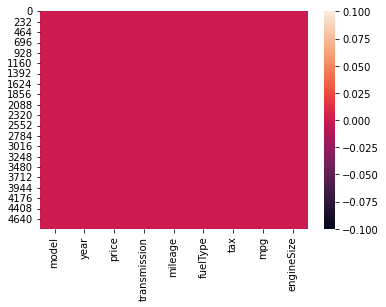

In [30]:
sns.heatmap(df.isnull())

In [31]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


2) Visualisasi data

C:\Users\Ade\AppData\Local\Temp\ipykernel_9428\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

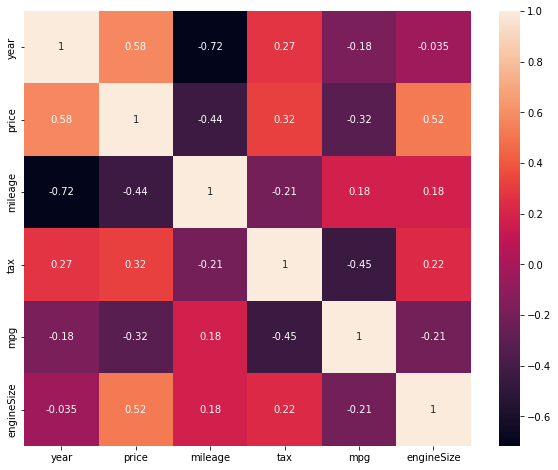

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [34]:
# jumlah mobil berdasarkan model
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Accent'),
  Text(1, 0, ' Amica'),
  Text(2, 0, ' Terracan'),
  Text(3, 0, ' Veloster'),
  Text(4, 0, ' Getz'),
  Text(5, 0, ' I800'),
  Text(6, 0, ' IX35'),
  Text(7, 0, ' I40'),
  Text(8, 0, ' IX20'),
  Text(9, 0, ' Santa Fe'),
  Text(10, 0, ' Ioniq'),
  Text(11, 0, ' Kona'),
  Text(12, 0, ' I20'),
  Text(13, 0, ' I30'),
  Text(14, 0, ' I10'),
  Text(15, 0, ' Tucson')])

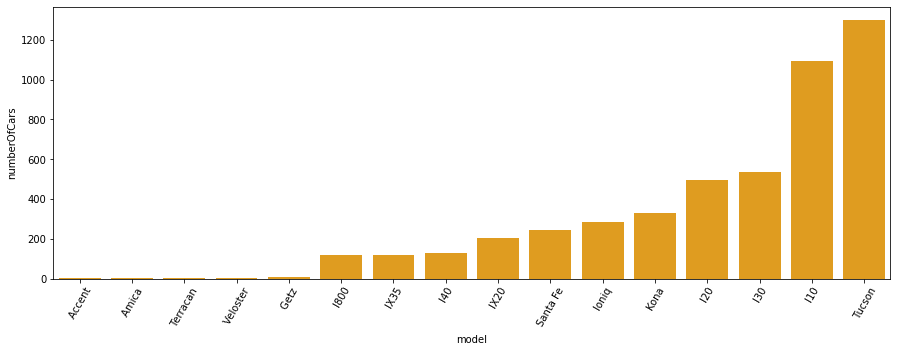

In [35]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='orange')
plt.xticks(rotation=60)

In [36]:
# untuk ukuran mesin
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

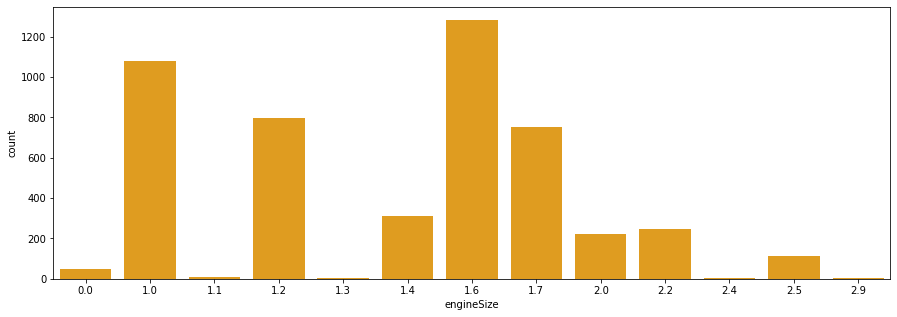

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='orange')

<Axes: xlabel='mileage', ylabel='Count'>

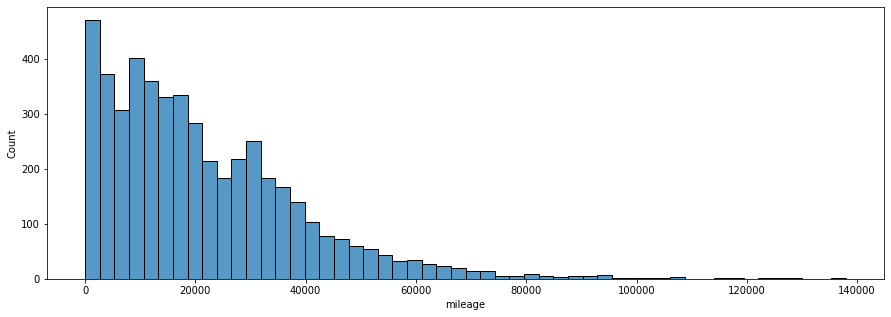

In [38]:
# distribusi mileage
plt.figure(figsize=(15,5))
sns.histplot(df['mileage'])

<Axes: xlabel='price', ylabel='Count'>

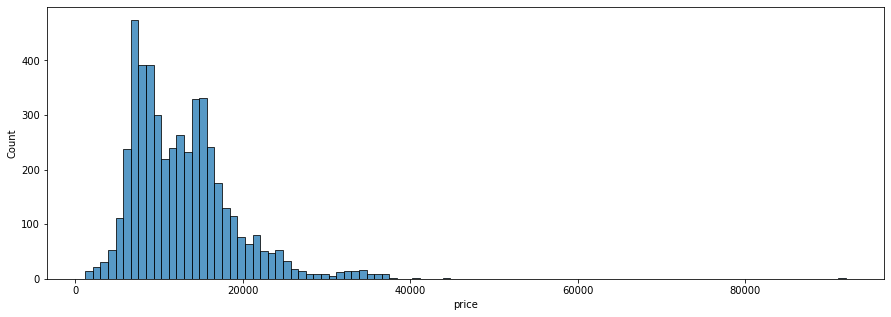

In [39]:
# distribusi harga mobil
plt.figure(figsize=(15,5))
sns.histplot(df['price'])

Seleksi Fitur

In [41]:
feature = ['year','mileage','tax','mpg','engineSize']
x = df[feature]
y = df['price']
x.shape, y.shape

((4860, 5), (4860,))

Split Data Training & Data Testing

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1215,)

Membuat Model Regresi Linier

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [44]:
score = lr.score(x_test, y_test)
print('Akurasi model regresi linier : ', score)

Akurasi model regresi linier :  0.6943788238567651


Membuat Input Model Regresi Linier

In [45]:
# year:2019, mileage:5000, tax:145, mpg:30.2, engineSize:2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)

Estimasi harga mobil dalam EUR : [22129.21067305]


c:\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Save Model

In [27]:
import pickle
filename = 'estimasi-mobil.sav'
pickle.dump(lr,open(filename, 'wb'))